In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Загрузка данных
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# предположим, что X - это ваши данные, а y - это метки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7597402597402597


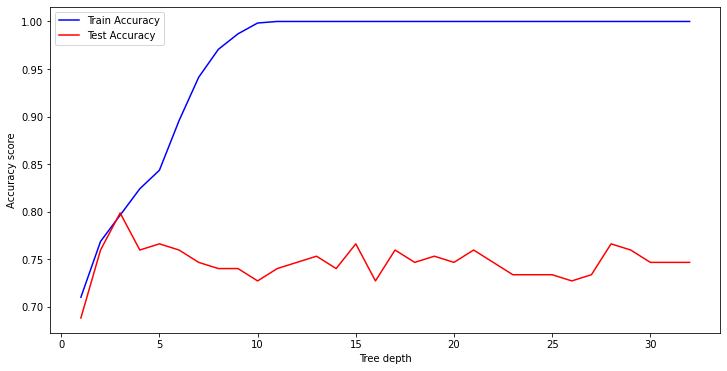

In [2]:
import matplotlib.pyplot as plt
import numpy as np

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_results.append(accuracy_score(y_train, train_pred))
   y_pred = model.predict(X_test)
   test_results.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


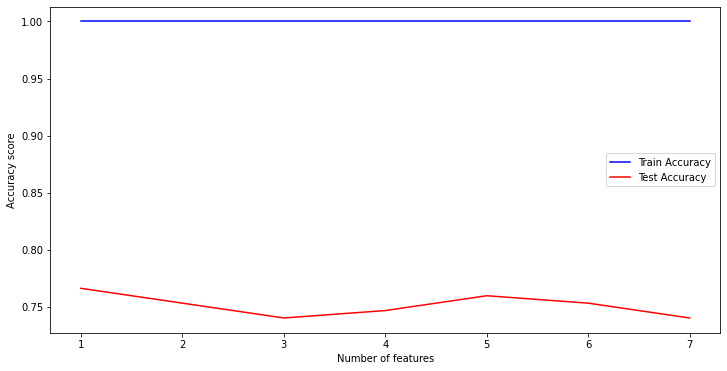

In [3]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   model = RandomForestClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   train_results.append(accuracy_score(y_train, train_pred))
   y_pred = model.predict(X_test)
   test_results.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(max_features, train_results, 'b', label='Train Accuracy')
plt.plot(max_features, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Number of features')
plt.legend()
plt.show()


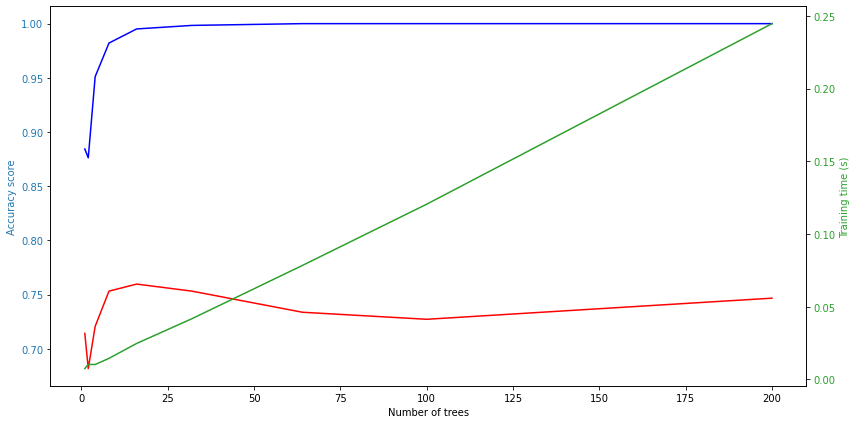

In [4]:
import time

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
train_time = []

for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   
   start_time = time.time()
   model.fit(X_train, y_train)
   end_time = time.time()
   
   train_time.append(end_time - start_time)
   
   train_pred = model.predict(X_train)
   train_results.append(accuracy_score(y_train, train_pred))
   
   y_pred = model.predict(X_test)
   test_results.append(accuracy_score(y_test, y_pred))

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of trees')
ax1.set_ylabel('Accuracy score', color=color)
ax1.plot(n_estimators, train_results, color='b', label='Train Accuracy')
ax1.plot(n_estimators, test_results, color='r', label='Test Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Training time (s)', color=color)  
ax2.plot(n_estimators, train_time, color=color, label='Training time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import time

# Предположим, что X - это ваши данные, а y - это метки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()
model = xgb.XGBClassifier(
    n_estimators=150, 
    max_depth=5, 
    learning_rate=0.06, 
    subsample=1,  
    gamma=1, 
    reg_alpha=0, 
    reg_lambda=200
)
model.fit(X_train, y_train)
end_time = time.time()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training time:", end_time - start_time)


Accuracy: 0.7727272727272727
Training time: 0.04812049865722656
